## Cumulative integration using SciPy

Recall that one way to think about an integral is as a sum of a bunch of tiny slices of the area between a function and an axis. We can use cumulative integration with trapezoidal shapes, which takes the difference between two points and the height of the two points to form a trapezoid, then finds the area of that trapezoid. We can find the integral of a data set at any point in time using the function 

<code> integrate.cumulative_trapezoid(y, x, inital_value)
</code>

For more, see the scipy documentation on cumulative trapezoid integration: https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.cumulative_trapezoid.html

Please start by installing the packages you'll need to run this notebook by hitting run on the next box. You would also install these directly using <code>pip install package</code> on your Ubuntu installation

In [39]:
import sys #You will not need to include this line in your driver file
!{sys.executable} -m pip install numpy #You will not need to include this line in your driver file
!{sys.executable} -m pip install scipy #You will not need to include this line in your driver file
!{sys.executable} -m pip install matplotlib #You will not need to include this line in your driver file

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 5.1 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 7.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 502.3/502.3 kB 6.6 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 5.8 MB/s eta 0:00:00a 0:00:01


Let's look at the result of integration with a random rate with a mean of zero and a standard deviation of 1e-3 (i.e., no bias)

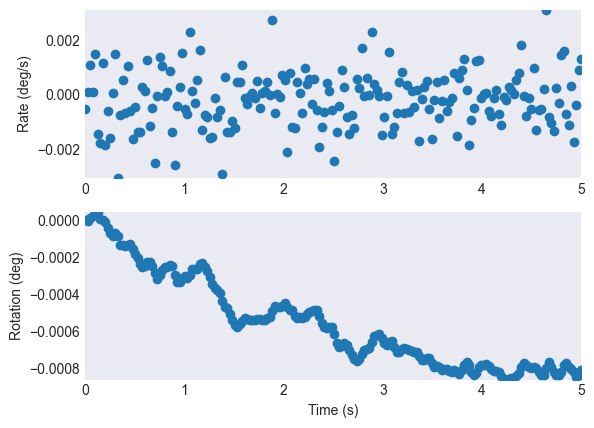

In [46]:
import numpy as np
import scipy.integrate as integrate
import matplotlib.pyplot as plt

#I'm creating time and rate arrays here for the example. You would read these in from your rosbags
time = np.linspace(0, 5, 40*5) #Create an array-like of time at "sampling frequency" of 40 Hz
rate = np.random.normal(loc = 0, scale = 1e-3, size = 40*5) #Create list of random variables representing rotational rate

rotation = integrate.cumulative_trapezoid(rate, time, initial = 0) #Give a cumulative integration using trapezoidal method    

#Plot settings
plt.style.use("seaborn-v0_8-dark")
fig = plt.figure()

ax0 = fig.add_subplot(2,1,1)
ax0.scatter(time, rate)
ax0.set(xlim = (0,np.amax(time)), ylim = (np.amin(rate), np.amax(rate))) #set axis limits
ax0.set_ylabel('Rate (deg/s)')

ax1 = fig.add_subplot(2,1,2)
ax1.scatter(time, rotation)
ax1.set(xlim = (0,np.amax(time)), ylim = (np.amin(rotation), np.amax(rotation))) #set axis limits
ax1.set_ylabel('Rotation (deg)')

plt.xlabel('Time (s)')
plt.show()

Now let's add in just a little bit of bias (the standard deviation itself).

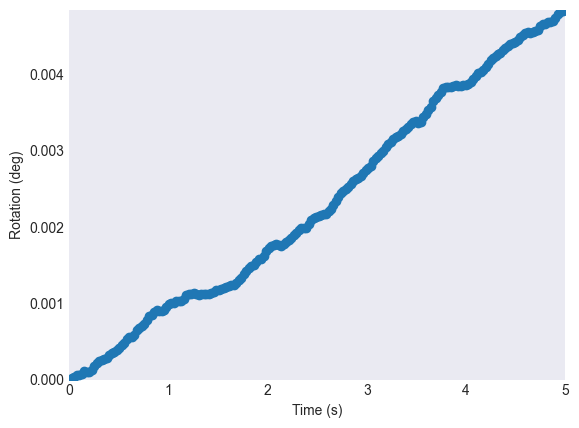

In [43]:
rate = rate + 1e-3 #Add a teeny bit of bias and re-evaluate

rotation = integrate.cumulative_trapezoid(rate, time, initial = 0) #Give a cumulative integration using trapezoidal method    

#Plot settings
plt.style.use("seaborn-v0_8-dark")
fig, ax = plt.subplots()

ax.scatter(time, rotation)
#ax.scatter(time, rate)
ax.set(xlim = (0,np.amax(time)), ylim = (np.amin(rotation), np.amax(rotation))) #set axis limits
plt.xlabel('Time (s)')
plt.ylabel('Rotation (deg)')
plt.show()

Bias makes a huge difference! It is likely that you will have some bias in your data. How will you deal with it?